In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re


In [3]:
data_path = "/Users/don/github-projects/pre-purchase-sentiment-prediction-MLOps/data/olist_customers_dataset.csv"
data = pd.read_csv(data_path)

In [4]:
data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,review_score,review_comment_message
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,4,"Não testei o produto ainda, mas ele veio corre..."
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,4,"Não testei o produto ainda, mas ele veio corre..."
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,4,"Não testei o produto ainda, mas ele veio corre..."
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1,credit_card,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,4,Deveriam embalar melhor o produto. A caixa vei...
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1,credit_card,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,5,"Só achei ela pequena pra seis xícaras ,mais é ..."


In [5]:
data.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'review_score',
       'review_comment_message'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115609 entries, 0 to 115608
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       115609 non-null  object 
 1   customer_id                    115609 non-null  object 
 2   order_status                   115609 non-null  object 
 3   order_purchase_timestamp       115609 non-null  object 
 4   order_approved_at              115595 non-null  object 
 5   order_delivered_carrier_date   114414 non-null  object 
 6   order_delivered_customer_date  113209 non-null  object 
 7   order_estimated_delivery_date  115609 non-null  object 
 8   payment_sequential             115609 non-null  int64  
 9   payment_type                   115609 non-null  object 
 10  payment_installments           115609 non-null  int64  
 11  payment_value                  115609 non-null  float64
 12  customer_unique_id            

In [7]:
#check for duplicates
data.duplicated().sum()

272

# Exploring the Dataset

In [8]:
def plot_data(df, plot_type, column1, column2=None, color=None, hue_color=None):
  """
  Creates a plot based on the specified plot type, columns, and color.
  Args:
      df: The DataFrame to plot.
      plot_type: The type of plot to create ("countplot", "histogram", or "scatter").
      column1: The first column to use for the plot.
      column2: The second column to use for the plot (optional, required for "scatter").
      color: The color to use for bars or data points (optional).
  """
  plt.figure(figsize=[12, 6])
  if plot_type == "countplot":
    sns.countplot(x=column1, data=df, hue="Revenue", palette=colors, legend=True)
  elif plot_type == "barplot":
    sns.barplot(x=column1, y=df[column2], data=df)  # Example for barplot
  elif plot_type == "histogram":
    sns.histplot(x=column1, data=df, kde=True, bins=5)  # Includes kernel density estimation
  elif plot_type == "scatter":
    if column2 is None:
      raise ValueError("Scatter plot requires two columns")
    sns.scatterplot(x=column1, y=column2, hue="Revenue", data=df)  # Optional hue argument for coloring by another variable
  else:
    raise ValueError(f"Unsupported plot type: {plot_type}")
  plt.show()


def plot_heatmap_for_numericals(df):
  """
  Creates a heatmap for the numerical features of a DataFrame.
  Args:
      df: The DataFrame to create the heatmap for.
  """
  plt.figure(figsize=[12, 6])
  # Filter numerical columns
  numerical_cols = df.select_dtypes(include=[np.number])
  # Create heatmap with chain method
  df.filter(items=numerical_cols.columns.tolist()) \
    .corr() \
    .pipe(sns.heatmap, cmap="coolwarm", annot=True)  # Use your preferred colormap
  plt.title("Correlation Heatmap")
  plt.show()

In [9]:
# Data Analysis and Preprocessing

(data
    # head(10)  # View the first 10 rows
    # .shape  # Get the dimensions of the DataFrame
    # .info()  # Get data types, memory usage, and non-null values
    # .describe(include='all').T  # Summary statistics for all columns, transposed
    # .columns  # List column names
    # .value_counts(dropna=False)  # Count unique values in each column, including NaN
    # .nunique()  # Count unique values in each column (excluding NaN)
    # .isnull().sum()  # Check for Number of missing values in each column
     .isnull().mean()  # Check for percentage of missing values in each column
    # .duplicated().sum()  # Check for duplicate rows
    # .hist()  # Plot histograms of numerical columns
    # .corr()  # Calculate the correlation matrix between numerical columns
    # .sort_values(by='Region')  # Sort by a specific column
    # .groupby('Revenue').agg("sum")  # Group data and apply aggregate function
    # .sample(5, random_state=42)  # Get a random sample of 5 rows
    # .groupby('speaker_id').agg(mean_pitch=pd.NamedAgg(column='pitch', aggfunc='mean'))  # Custom aggregation
    # .pivot_table(values='duration', index='speaker_id', columns='emotion', aggfunc='mean')  # Pivot table
    # .resample('1S').mean().rolling(window=10).mean()  # Time series analysis (if applicable)
    # .apply(pd.to_numeric, errors='coerce')  # Attempt numeric conversion for potential mixed-type columns
    # .select_dtypes(include=['object']).head()  # Explore categorical columns
    # .plot(kind='box', subplots=True, layout=(3, 3), figsize=(15, 10))  # Boxplots for visual analysis
    # .corrwith(data['Revenue'])  # Explore correlations with a target column
    # .Revenue.value_counts() # Counts the unique values of the target column
    # .groupby("Browser").size().to_frame(name="count").reset_index() 
    # .pipe(plot_data, "countplot", "VisitorType")  # Call with plot type and column
    # .pipe(plot_heatmap_for_numericals)  # Apply heatmap function
    #.pipe(plot_data, "scatter", "ProductRelated_Duration", "ProductRelated", "blue")
)

order_id                         0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.000121
order_delivered_carrier_date     0.010337
order_delivered_customer_date    0.020760
order_estimated_delivery_date    0.000000
payment_sequential               0.000000
payment_type                     0.000000
payment_installments             0.000000
payment_value                    0.000000
customer_unique_id               0.000000
customer_zip_code_prefix         0.000000
customer_city                    0.000000
customer_state                   0.000000
order_item_id                    0.000000
product_id                       0.000000
seller_id                        0.000000
shipping_limit_date              0.000000
price                            0.000000
freight_value                    0.000000
product_category_name            0.000000
product_name_lenght              0

# Data Cleaning and Preprocessing using Pandas Chain Method

In [10]:
def rename_to_snake_case(df):
 """
 Renames the columns of a DataFrame to snake_case, handling camel case, acronyms, Pascal case, hyphens, and multiple spaces.
 Args:
     df: The DataFrame to rename.
 Returns:
     A new DataFrame with the columns renamed to snake_case.
 """
 return df.rename(columns=lambda s: '_'.join([word.lower() for word in re.findall(r'[A-Z][a-z]*', s.replace('-', '_').replace('  ', '_'))]))

In [11]:
# method from code used for titanic dataset. Some methods here are not relevant to the current dataset
df = (data
    # Rename the column to snake-case style
    #.pipe(rename_to_snake_case)
    # Drop duplicates
    #.drop_duplicates()
    ## Drop columns with more than 25% missing values
    .loc[:, data.isnull().mean() <= 0.5]
    ## Drop unnecessary columns
    # .drop([], axis=1)
    ## Fill missing values with the median age, mode, and mean respectively
    #.assign(age=lambda x: x['age'].fillna(x['age'].median()),
    #       embarked=lambda x: x['embarked'].fillna(x['embarked'].mode()[0]),
    #        fare=lambda x: x['fare'].fillna(x['fare'].mean())
    #        )
    # Create a new column 'family_size' by adding the 'sibsp' and 'parch' columns
    #.assign(family_size=lambda x: x['sibsp'] + x['parch'])
    # Create a new column 'is_alone' to indicate whether the passenger is alone or not
    #.assign(is_alone=lambda x: x['family_size'].apply(lambda x: 1 if x == 0 else 0))
    # Convert categorical variables into dummy variables or into numerical, use .assign below
    #.pipe(pd.get_dummies, columns=['pclass', 'sex', 'embarked'])
    #.assign(sex=lambda x: x['sex'].map({'male': 0, 'female': 1}),
    #        embarked=lambda x: x['embarked'].map({'S': 0, 'C': 1, 'Q': 2})
    #        )
    # Drop redundant columns and columns with missing values
    #.drop(['sibsp', 'parch', 'family_size'], axis=1)
    .dropna() # Drop rows with missing values
    # set the 'Survived' column as the target variable
    #.rename(columns={'survived': 'target'})
    # Remove outliers in 'age' and 'fare' simultaneously
    #.pipe(handle_outliers, ['age', 'fare'])
    #.reset_index(drop=True)
    #.info()
    #.describe()
    #. head(10)
) # Before drop duplicates, shape = (12330, 18)

df.shape

(113193, 32)

In [12]:
data.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'review_score',
       'review_comment_message'],
      dtype='object')

In [13]:
datetime_cols = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'shipping_limit_date']
data[datetime_cols].head()

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date
0,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10-06 11:07:15
1,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10-06 11:07:15
2,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10-06 11:07:15
3,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,2017-08-21 20:05:16
4,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,2017-08-08 18:37:31


In [55]:
def preprocess_data(df: pd.DataFrame) -> pd.DataFrame:
    """
    Clean and preprocess the given DataFrame.
    """
    # Define the patterns to look for in column names
    patterns = ['date', 'timestamp', '_at']
    
    # Filter columns that match any of the patterns
    datetime_cols = [col for col in df.columns if any(pattern in col for pattern in patterns)]

    redundant_cols = ['product_name_lenght', 'product_description_lenght', 
                      'product_photos_qty', 'review_score', 'order_delivered_customer_date',
                      'order_approved_at', 'order_estimated_delivery_date', 'order_purchase_timestamp',
                      'product_length_cm', 'product_height_cm', 'product_width_cm',
                      'price', 'freight_value'
                      ]
    print(datetime_cols)

    id_cols = df.filter(like='_id').columns.tolist()
    print(id_cols)
    
    df = (df
          # Drop columns with more than 50% missing values
          .dropna(thresh=len(df) * 0.5, axis=1)
          # Convert datetime columns
          .assign(**{col: pd.to_datetime(df[col], errors='coerce') for col in datetime_cols})
          # Calculate new features
          .assign(
              time_to_delivery=lambda x: (x['order_delivered_customer_date'] - x['order_approved_at']).dt.days,
              order_processing_time=lambda x: (x['order_approved_at'] - x['order_purchase_timestamp']).dt.days,
              estimated_vs_actual_shipping=lambda x: (x['order_estimated_delivery_date'] - x['order_delivered_customer_date']).dt.days,
              product_volume_m3=lambda x: (x['product_length_cm'] * x['product_width_cm'] * x['product_height_cm']) / 1000000,
              satisfaction=lambda x: (x['review_score'] >= 4).astype(int),
              order_value=lambda x: x['price'] + x['freight_value'],
              late_delivery=lambda x: (x['order_delivered_customer_date'] > x['order_estimated_delivery_date']).astype(int)
          )
          # Drop rows with missing values
          .dropna()
          # Create seasonal features from order_purchase_timestamp
          .assign(
              order_month=lambda x: x['order_purchase_timestamp'].dt.month,
              order_day=lambda x: x['order_purchase_timestamp'].dt.dayofweek,
              order_hour=lambda x: x['order_purchase_timestamp'].dt.hour
          )
          # Drop redundant columns
          .drop(columns = redundant_cols)
          .drop(columns = id_cols)
          .drop(columns = datetime_cols)
         )
    
    return df

In [56]:
df_clean = preprocess_data(data)
df_clean.head()

['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'shipping_limit_date']
['order_id', 'customer_id', 'customer_unique_id', 'order_item_id', 'product_id', 'seller_id']


,order_id,customer_id,order_status,order_delivered_carrier_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,...,time_to_delivery,order_processing_time,estimated_vs_actual_shipping,product_volume_m3,satisfaction,order_value,late_delivery,order_month,order_day,order_hour
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-04 19:55:00,1,credit_card,1,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,...,8.0,0.0,7.0,0.001976,1,38.71,0,10,0,10
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-04 19:55:00,3,voucher,1,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,...,8.0,0.0,7.0,0.001976,1,38.71,0,10,0,10
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-04 19:55:00,2,voucher,1,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,...,8.0,0.0,7.0,0.001976,1,38.71,0,10,0,10
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-17 15:28:33,1,credit_card,3,37.77,3a51803cc0d012c3b5dc8b7528cb05f7,3366,...,2.0,0.0,9.0,0.001976,1,37.77,0,8,1,18
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-04 17:35:43,1,credit_card,1,37.77,ef0996a1a279c26e7ecbd737be23d235,2290,...,4.0,0.0,7.0,0.001976,1,37.77,0,8,2,18


In [57]:
df_clean.shape

(113193, 29)

In [58]:
id_cols = df_clean.filter(like='_id').columns.tolist()
df_clean[id_cols].head()

,order_id,customer_id,customer_unique_id,order_item_id,product_id,seller_id
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,3a51803cc0d012c3b5dc8b7528cb05f7,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,ef0996a1a279c26e7ecbd737be23d235,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9


In [59]:
# Check the distribution of the target percentage
df_clean['satisfaction'].value_counts() / len(df_clean) * 100

satisfaction
1    76.821005
0    23.178995
Name: count, dtype: float64

In [60]:
# Separate columns by data type, excluding the target column
target_col = "satisfaction"
numerical_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns.difference([target_col]).tolist()
categorical_cols = df_clean.select_dtypes(include=['object']).columns.tolist()
datetime_cols = df_clean.select_dtypes(include=['datetime64']).columns.tolist()

In [61]:
numerical_cols

['customer_zip_code_prefix',
 'estimated_vs_actual_shipping',
 'late_delivery',
 'order_item_id',
 'order_processing_time',
 'order_value',
 'payment_installments',
 'payment_sequential',
 'payment_value',
 'product_volume_m3',
 'product_weight_g',
 'time_to_delivery']

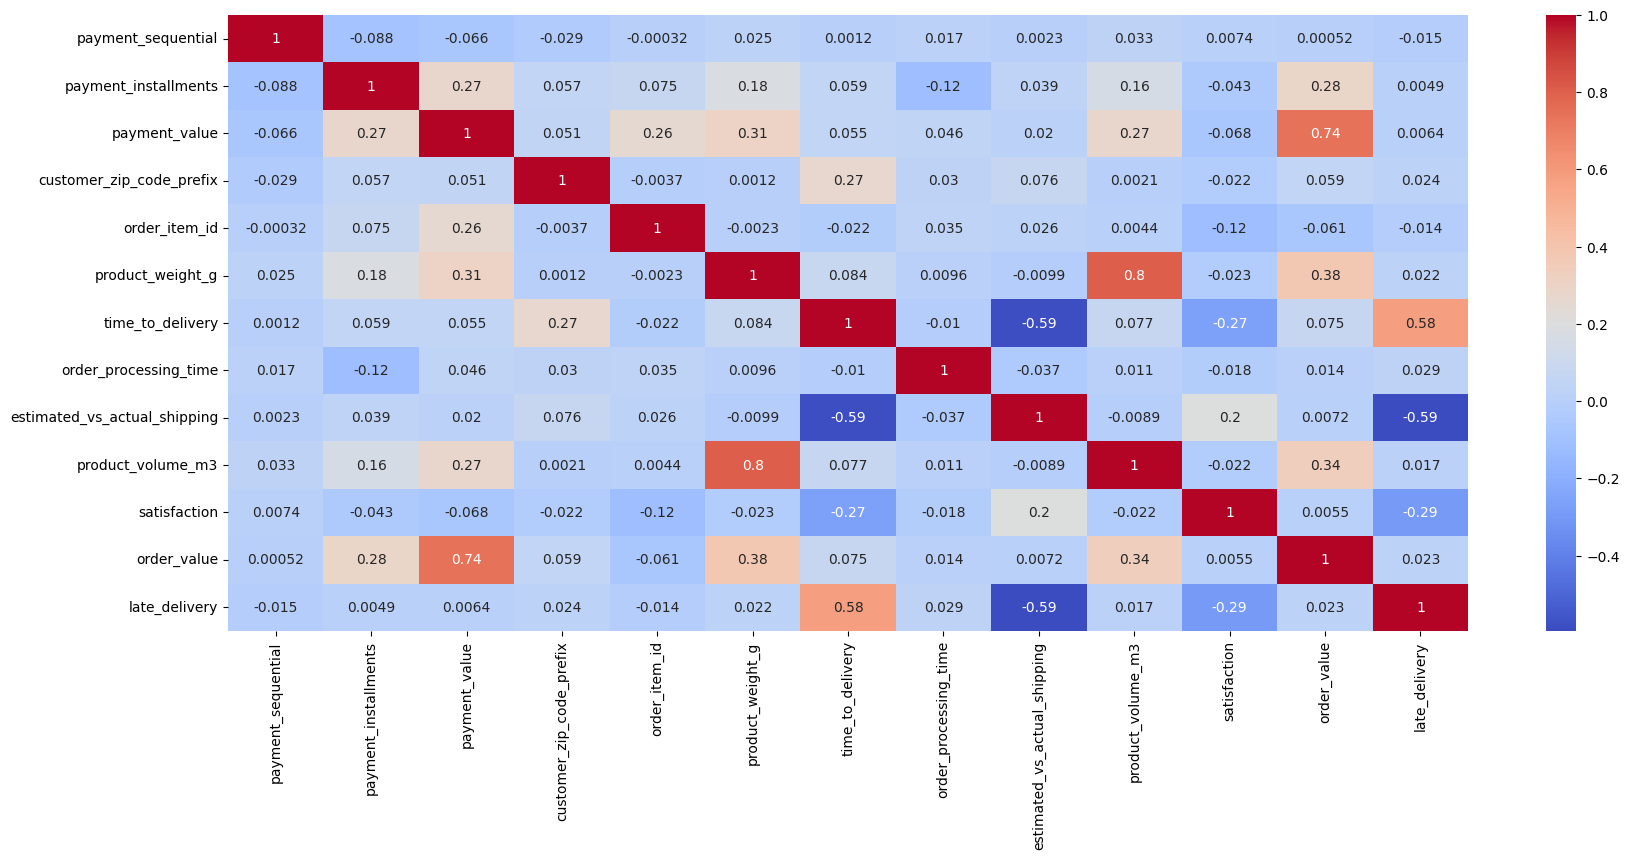

In [62]:
# Plot the correlation matrix heatmap with numeric columns
plt.figure(figsize=(20, 8))
df_numerical = df_clean.select_dtypes(include=['int64', 'float64'])
sns.heatmap(df_numerical.corr(), annot=True, cmap='coolwarm')
plt.show()

# Machine Learning 
## Prediction Customer Statisfaction (A derived Feature from review_score)

In [63]:
# Identifying top 10 features with highest correlation with 'satisfaction'
# Select only the numeric columns for correlation calculation
numeric_cols = df_clean.select_dtypes(include=[np.number])

# Compute the correlation matrix for numeric columns only
corr_matrix = numeric_cols.corr()

# Print the top 10 features correaltion score
print(corr_matrix['satisfaction'].sort_values(ascending=False)[1:-1])

estimated_vs_actual_shipping    0.200293
order_month                     0.027864
order_hour                      0.009535
payment_sequential              0.007372
order_value                     0.005543
order_day                      -0.015242
order_processing_time          -0.018413
customer_zip_code_prefix       -0.022217
product_volume_m3              -0.022307
product_weight_g               -0.023465
payment_installments           -0.042748
payment_value                  -0.068124
order_item_id                  -0.121016
time_to_delivery               -0.267583
Name: satisfaction, dtype: float64


In [64]:
numeric_cols.columns.tolist()

['payment_sequential',
 'payment_installments',
 'payment_value',
 'customer_zip_code_prefix',
 'order_item_id',
 'product_weight_g',
 'time_to_delivery',
 'order_processing_time',
 'estimated_vs_actual_shipping',
 'product_volume_m3',
 'satisfaction',
 'order_value',
 'late_delivery',
 'order_month',
 'order_day',
 'order_hour']

In [70]:
df_clean.payment_installments.unique()

array([ 1,  3, 10,  2,  5,  4,  7,  8,  6,  9, 11, 12, 15, 17,  0, 20, 18,
       13, 16, 14, 24, 22, 21, 23])

In [66]:
# Separate columns by data type, excluding the target column
#numerical_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns.difference(['review_score']).tolist()
#categorical_cols = df_clean.select_dtypes(include=['object']).columns.tolist()
#datetime_cols = df_clean.select_dtypes(include=['datetime64']).columns.tolist()

In [79]:
target_col = 'satisfaction'
numerical_cols = ['payment_value', 'order_value', 'product_weight_g', 'product_volume_m3', 'order_item_id', 'estimated_vs_actual_shipping',
                  'time_to_delivery', 'order_processing_time', 'payment_installments','customer_zip_code_prefix']
categorical_cols = ['order_month', 'order_day', 'order_hour','late_delivery']

In [80]:
categorical_cols

['order_month', 'order_day', 'order_hour', 'late_delivery']

In [81]:
#datetime_cols

In [82]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [83]:
# Pipelines for different types of data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

datetime_transformer = Pipeline(steps=[
    ('datetime', FunctionTransformer(lambda x: x))
])

# Combine all transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols),
        #('date', datetime_transformer, datetime_cols)
    ])

# Separate the target column
X = df_clean.drop(columns=['satisfaction'])
y = df_clean['satisfaction']

In [84]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
X_train.columns

Index(['order_id', 'customer_id', 'order_status',
       'order_delivered_carrier_date', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'product_category_name', 'product_weight_g',
       'product_category_name_english', 'time_to_delivery',
       'order_processing_time', 'estimated_vs_actual_shipping',
       'product_volume_m3', 'order_value', 'late_delivery', 'order_month',
       'order_day', 'order_hour'],
      dtype='object')

In [90]:
# Preprocessing the data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

In [93]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_split=50),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(random_state=42)
}

Evaluating Logistic Regression


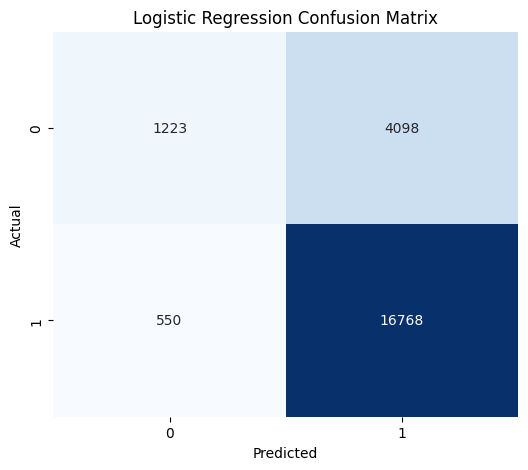

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.23      0.34      5321
           1       0.80      0.97      0.88     17318

    accuracy                           0.79     22639
   macro avg       0.75      0.60      0.61     22639
weighted avg       0.78      0.79      0.75     22639

Evaluating Decision Tree


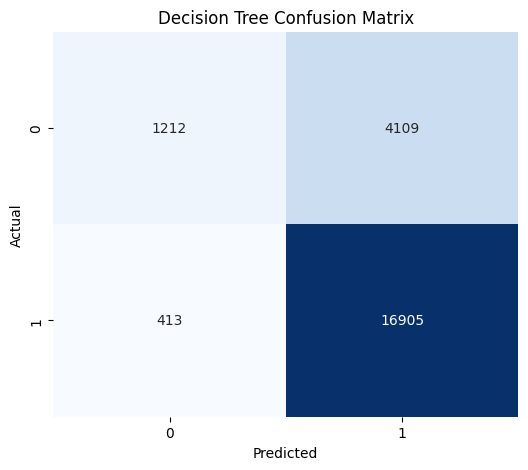

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.23      0.35      5321
           1       0.80      0.98      0.88     17318

    accuracy                           0.80     22639
   macro avg       0.78      0.60      0.62     22639
weighted avg       0.79      0.80      0.76     22639

Evaluating Random Forest


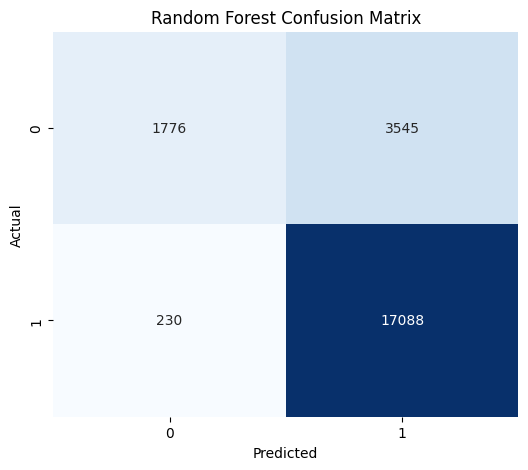

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.33      0.48      5321
           1       0.83      0.99      0.90     17318

    accuracy                           0.83     22639
   macro avg       0.86      0.66      0.69     22639
weighted avg       0.84      0.83      0.80     22639

Evaluating XGBoost


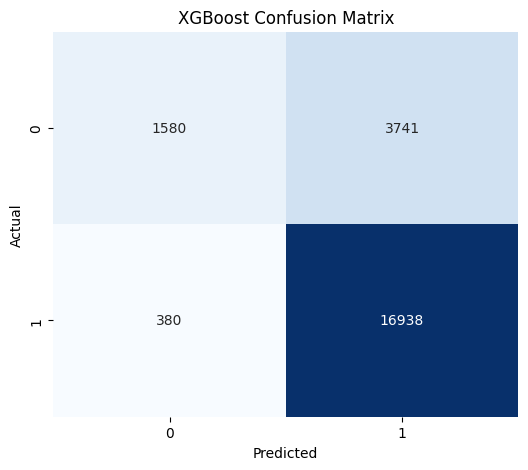

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.30      0.43      5321
           1       0.82      0.98      0.89     17318

    accuracy                           0.82     22639
   macro avg       0.81      0.64      0.66     22639
weighted avg       0.82      0.82      0.78     22639



In [94]:
# Function to fit models, make predictions, and evaluate them
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    
    # Plotting confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()
    
    print(f"{model_name} Classification Report:")
    print(class_report)

# Evaluate each model
for model_name, model in models.items():
    print(f"Evaluating {model_name}")
    evaluate_model(model, X_train_preprocessed, y_train, X_test_preprocessed, y_test, model_name)